In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

In [ ]:
df_hospitales= pd.read_csv("/content/drive/MyDrive/Universidad/Tercer Semestre/10K Challenge/Poblacion_Aleatoria_Clasificada.csv")
df_hospitales.head()

,X,geometry,Longitud,Latitud,Municipio,Poblacion,DistanciaHospital,nUnidades,ConsultoriosG,ConsultoriosO,CamasH,CamasO,Division,DistanciaBajo,DistanciaAlto,Is_Alto
0,0,POINT (-5897334.475580929 -6438420.141012958),-99.411325,19.414971,Lerma,170327,9250.657443,4,6,6,0,4,0.000023,3749.350825,4250.696731,False
1,1,POINT (-6024265.267600001 -6259259.868778107),-99.867642,19.784078,Atlacomulco,109384,1757.673911,10,13,26,60,55,0.000091,11242.657422,3242.998993,True
2,2,POINT (-5615930.730808745 -6344685.510352412),-98.725791,19.824901,Nopaltepec,10351,11864.406740,2,3,1,0,0,0.000193,1135.594141,6864.449424,False
3,3,POINT (-5697757.150076834 -6394615.218432343),-98.911101,19.649067,Acolman,171507,5539.205846,12,18,14,0,0,0.000070,7460.827796,539.545128,True
4,4,POINT (-6162101.086462797 -6423527.525288753),-100.120311,19.283378,Donato Guerra,37436,9602.997349,2,4,1,0,0,0.000053,3397.003093,4603.058504,False


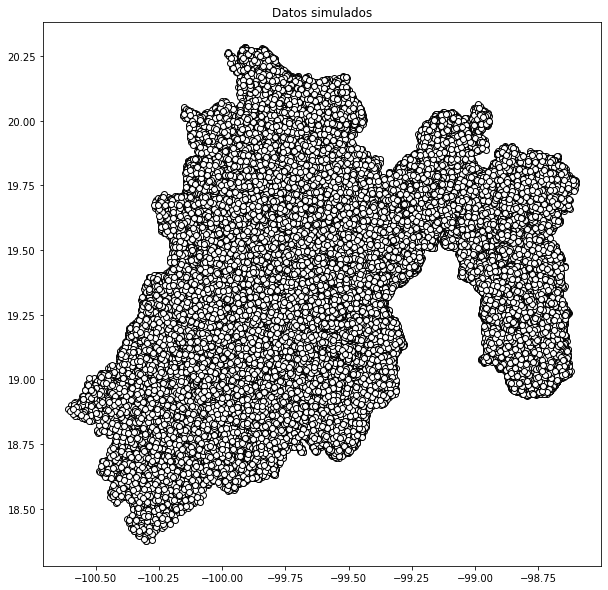

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(
    x = df_hospitales.iloc[:, 2],
    y = df_hospitales.iloc[:, 3], 
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');


In [ ]:
X=df_hospitales.iloc[:,6:13]
X.head()

,DistanciaHospital,nUnidades,ConsultoriosG,ConsultoriosO,CamasH,CamasO,Division
0,9250.657443,4,6,6,0,4,0.000023
1,1757.673911,10,13,26,60,55,0.000091
2,11864.406740,2,3,1,0,0,0.000193
3,5539.205846,12,18,14,0,0,0.000070
4,9602.997349,2,4,1,0,0,0.000053


In [ ]:
wcss= []

for i in range(1,11):
  print(i)
  kmenas= KMeans(n_clusters=i, max_iter=300)
  kmenas.fit(X)
  wcss.append(kmenas.inertia_)

1
2
3
4
5
6
7
8
9
10


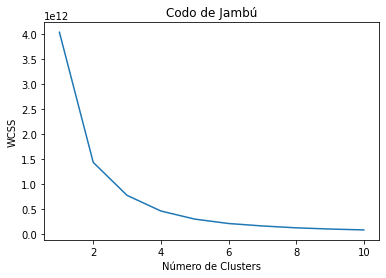

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
clusters=2
X_norm= (X-X.min())/(X.max()-X.min())
clustering= KMeans(n_clusters=clusters,max_iter=300)
clustering.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df_hospitales['KMeans_2Clusters']=clustering.labels_
df_hospitales.head()

,X,geometry,Longitud,Latitud,Municipio,Poblacion,DistanciaHospital,nUnidades,ConsultoriosG,ConsultoriosO,CamasH,CamasO,Division,DistanciaBajo,DistanciaAlto,Is_Alto,KMeans_2Clusters
0,0,POINT (-5897334.475580929 -6438420.141012958),-99.411325,19.414971,Lerma,170327,9250.657443,4,6,6,0,4,0.000023,3749.350825,4250.696731,False,0
1,1,POINT (-6024265.267600001 -6259259.868778107),-99.867642,19.784078,Atlacomulco,109384,1757.673911,10,13,26,60,55,0.000091,11242.657422,3242.998993,True,1
2,2,POINT (-5615930.730808745 -6344685.510352412),-98.725791,19.824901,Nopaltepec,10351,11864.406740,2,3,1,0,0,0.000193,1135.594141,6864.449424,False,0
3,3,POINT (-5697757.150076834 -6394615.218432343),-98.911101,19.649067,Acolman,171507,5539.205846,12,18,14,0,0,0.000070,7460.827796,539.545128,True,0
4,4,POINT (-6162101.086462797 -6423527.525288753),-100.120311,19.283378,Donato Guerra,37436,9602.997349,2,4,1,0,0,0.000053,3397.003093,4603.058504,False,0


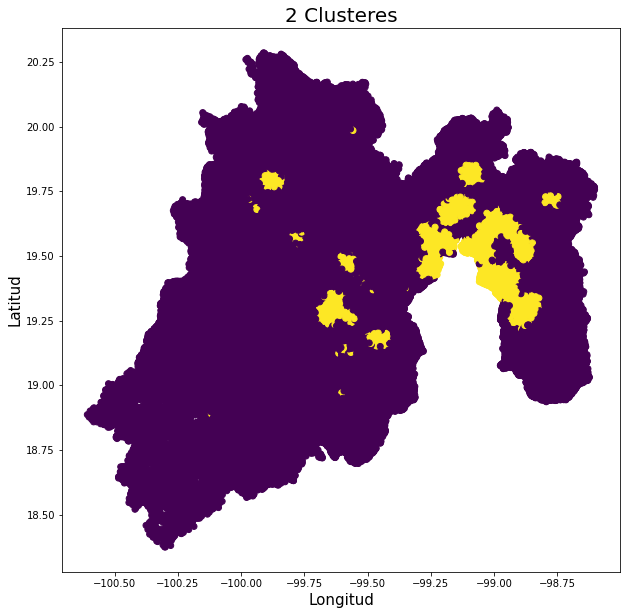

In [ ]:
fig= plt.figure(figsize=(10,10))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel('Longitud',fontsize=15)
ax.set_ylabel('Latitud',fontsize=15)
ax.set_title("2 Clusteres", fontsize=20)

ax.scatter(x=df_hospitales.iloc[:, 2], y=df_hospitales.iloc[:, 3],
           c=df_hospitales.iloc[:, 16])

In [ ]:
clusters=3
X_norm= (X-X.min())/(X.max()-X.min())
clustering= KMeans(n_clusters=clusters,max_iter=300)
clustering.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df_hospitales['KMeans_3Clusters']=clustering.labels_
df_hospitales.head()

,X,geometry,Longitud,Latitud,Municipio,Poblacion,DistanciaHospital,nUnidades,ConsultoriosG,ConsultoriosO,CamasH,CamasO,Division,DistanciaBajo,DistanciaAlto,Is_Alto,KMeans_2Clusters,KMeans_3Clusters
0,0,POINT (-5897334.475580929 -6438420.141012958),-99.411325,19.414971,Lerma,170327,9250.657443,4,6,6,0,4,0.000023,3749.350825,4250.696731,False,0,0
1,1,POINT (-6024265.267600001 -6259259.868778107),-99.867642,19.784078,Atlacomulco,109384,1757.673911,10,13,26,60,55,0.000091,11242.657422,3242.998993,True,1,2
2,2,POINT (-5615930.730808745 -6344685.510352412),-98.725791,19.824901,Nopaltepec,10351,11864.406740,2,3,1,0,0,0.000193,1135.594141,6864.449424,False,0,0
3,3,POINT (-5697757.150076834 -6394615.218432343),-98.911101,19.649067,Acolman,171507,5539.205846,12,18,14,0,0,0.000070,7460.827796,539.545128,True,0,2
4,4,POINT (-6162101.086462797 -6423527.525288753),-100.120311,19.283378,Donato Guerra,37436,9602.997349,2,4,1,0,0,0.000053,3397.003093,4603.058504,False,0,0


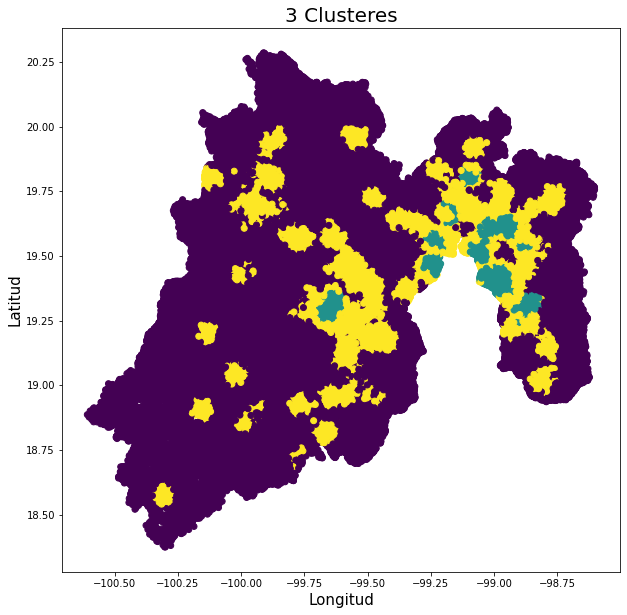

In [ ]:
fig= plt.figure(figsize=(10,10))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel('Longitud',fontsize=15)
ax.set_ylabel('Latitud',fontsize=15)
ax.set_title("3 Clusteres", fontsize=20)

ax.scatter(x=df_hospitales.iloc[:, 2], y=df_hospitales.iloc[:, 3],
           c=df_hospitales.iloc[:, 17])

In [ ]:
df_hospitales.to_csv("Poblacion_Aleatoria_Agrupada.csv")